# Imports

In [1]:
%reload_ext autoreload
%autoreload 2

import pickle
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statannotations.Annotator import Annotator
from matplotlib.gridspec import GridSpecFromSubplotSpec
import pycircstat

import warnings
warnings.simplefilter("ignore", FutureWarning)
warnings.filterwarnings("ignore", module="pycircstat.tests")

/home/kilo/miniconda3/envs/my_custom_environment/lib/python3.11/site-packages/nose/plugins/manager.py:418: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [2]:
import nose
nose.__version__

'1.3.7'

In [3]:
%run functions.py
%run ../../setup_project.py
%run ../../generic_plot_functions.py

In [4]:
projectName, dataPath, dlcModelPath, myProject, sSessions = setup_project_session_lists(projectName="autopi_mec",dataPath=PROJECT_DATA_PATH,dlcModelPath="")

creating myProject, an autopipy.project object
Project name: autopi_mec
dataPath: /ext_drives/d91/data/projects/jingjie/Peng_et.al_2025_noInt/
dlcModelPath: 
Reading /ext_drives/d91/data/projects/jingjie/Peng_et.al_2025_noInt//sessionList
We have 180 testing sessions in the list
spikeA.Kilosort_session objects are in sSessions


# Params

In [4]:
GLOBALFONTSIZE = 11
GLOBALTICKWIDTH = 1.6
GLOBALTICKLENGTH = 6

# Load data

In [5]:
fn = myProject.dataPath + '/results/behavior_180_EastReferenceQuadrant.csv'
res = pd.read_csv(fn)

In [6]:
res = res[res.valid]

In [7]:
#Get the instantanous variables
fn = myProject.dataPath + '/results/instan_behavior_180_EastReference.csv'
instanDf = pd.read_csv(fn)
instanDf['sessionName'] = instanDf['name'].apply(lambda x: x.split('_')[0])
instanDf['mouse'] = instanDf['name'].apply(lambda x: x.split('-')[0])
instanDf['condition'] = instanDf['name'].apply(lambda x: x.split('_')[2])
instanDf['distanceFromCenter'] = np.sqrt(instanDf.x**2 + instanDf.y**2)

In [8]:
# Merge the dataframes
mergedDf = res.merge(instanDf,left_on= ['sessionName','trialNo'],right_on=['sessionName','trialNo'], how = 'left')

In [9]:
import gc
# Clean up memory
del instanDf
gc.collect()

14

# Functions

In [10]:
def plot_trial_split_by_median(ax, inputDf, lightCondition, title=""):
    
    lever_palette = {"left": "#3F92E9", "right": "#FF5630"}
    
    sns.scatterplot(
        data=inputDf[(inputDf.light == lightCondition) & (inputDf.nJourneys == 1)],
        x="x",
        y="y",
        palette=lever_palette,
        hue="leverLeft",
        hue_order=["left", "right"],
        s=4,
        ax=ax,
        legend=False,
    )

    ax.set_title(title, fontsize=GLOBALFONTSIZE)

    # Set xlim and ylim, as well as the ticks
    ax.set_xlim(-50, 50)
    ax.set_ylim(-50, 50)

    custom_ticks = [-40, 0, 40]
    ax.set_xticks(custom_ticks)
    ax.set_yticks(custom_ticks)
    ax.tick_params(
        axis="both",
        which="both",
        labelsize=GLOBALFONTSIZE,
        width=GLOBALTICKWIDTH,
        length=GLOBALTICKLENGTH,
    )

    ax.set_xlabel("X coordinate (cm)", fontsize=GLOBALFONTSIZE)
    ax.set_ylabel("Y coordinate (cm)", fontsize=GLOBALFONTSIZE)

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)

In [11]:
def plot_lever_location(ax,inputDf,lightCondition,title=''):
    lever_palette = {'left':'#3F92E9',
               'right':'#FF5630'}
    
    sns.scatterplot(data=inputDf[(inputDf.light == lightCondition)&(inputDf.nJourneys == 1)],x='leverX',y='leverY',palette=lever_palette,hue='leverLeft',hue_order = ['left','right'],ax=ax,legend=False)

    ax.set_title(title,fontsize = GLOBALFONTSIZE)

    #Set xlim and ylim, as well as the ticks
    ax.set_xlim(-50, 50)
    ax.set_ylim(-50, 50)

    custom_ticks = [-40, 0, 40]
    ax.set_xticks(custom_ticks)
    ax.set_yticks(custom_ticks)
    ax.tick_params(axis='both', which='both', labelsize=GLOBALFONTSIZE, width=GLOBALTICKWIDTH, length=GLOBALTICKLENGTH)

    ax.set_xlabel('X coordinate (cm)',fontsize = GLOBALFONTSIZE)
    ax.set_ylabel('Y coordinate (cm)',fontsize = GLOBALFONTSIZE)


    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

In [12]:
def plot_lever_animal_path(ax, inputDf, lightCondition, title=""):
    lever_palette = {"left": "#3F92E9", "right": "#FF5630"}

    sns.scatterplot(
        data=inputDf[(inputDf.light == lightCondition) & (inputDf.nJourneys == 1)],
        x="x",
        y="y",
        palette=lever_palette,
        hue="leverLeft",
        hue_order=["left", "right"],
        s=4,
        ax=ax,
        legend=False,
    )  

    ax.set_title(title, fontsize=GLOBALFONTSIZE)

    # Set xlim and ylim, as well as the ticks
    ax.set_xlim(-50, 50)
    ax.set_ylim(-50, 50)

    custom_ticks = [-40, 0, 40]
    ax.set_xticks(custom_ticks)
    ax.set_yticks(custom_ticks)
    ax.tick_params(
        axis="both",
        which="both",
        labelsize=GLOBALFONTSIZE,
        width=GLOBALTICKWIDTH,
        length=GLOBALTICKLENGTH,
    )

    ax.set_xlabel("X coordinate (cm)", fontsize=GLOBALFONTSIZE)
    ax.set_ylabel("Y coordinate (cm)", fontsize=GLOBALFONTSIZE)

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)

In [13]:
def euclidean_distance(x1, y1, x2, y2):
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

def calculate_within_trial_distance(group):
    # Calculate the difference in distance between consecutive points
    distances = euclidean_distance(group['x'], group['y'], group['x'].shift(), group['y'].shift())
    # Fill the first NaN value with 0 as there's no previous point for the first row
    distances.iloc[0] = 0
    # Calculate the cumulative sum of distances within each trial
    group['withinTrialDistance'] = distances.cumsum()
    return group


In [14]:
def calculate_movement_vector(group):
    group['dx'] = group['x'].diff()
    group['dy'] = group['y'].diff()
    group['movement_vector_radians'] = np.arctan2(group['dy'], group['dx'])
    return group

In [15]:
def circular_median(angles):
    """
    Calculate the circular median for a set of angles, handling NaN values.
    
    Args:
        angles (array-like): Array of angles in radians, ranging from -π to π, may contain NaN values.
    
    Returns:
        float: The circular median angle in radians. Returns np.nan if all values are NaN.
    """
    angles = np.asarray(angles)
    
    # Filter out NaN values
    valid_angles = angles[~np.isnan(angles)]
    
    # If all values are NaN, return NaN
    if len(valid_angles) == 0:
        return np.nan
    
    valid_angles = (valid_angles + np.pi) % (2 * np.pi) - np.pi  # Map angles to [-π, π)
    
    # Initialize the median angle and minimum sum of distances
    median_angle = 0
    min_distance_sum = np.inf
    
    # Iterate over each angle and calculate the sum of circular distances
    for angle in valid_angles:
        # Calculate the circular distances between the current angle and all other angles
        diffs = angle - valid_angles
        diffs = (diffs + np.pi) % (2 * np.pi) - np.pi
        distances = np.abs(diffs)
        
        # Calculate the sum of circular distances
        distance_sum = np.sum(distances)
        
        # Update the median angle if the current angle has a smaller sum of distances
        if distance_sum < min_distance_sum:
            median_angle = angle
            min_distance_sum = distance_sum
    
    return median_angle

In [16]:
def plot_left_right_distribution(ax,testG1_searchDf,lightCondition):
    lever_palette = {'left':'#3F92E9',
               'right':'#FF5630'}
    sns.histplot(data=testG1_searchDf[(testG1_searchDf.light==lightCondition)&(testG1_searchDf.nJourneys == 1)], x = 'movement_vector_radians',hue='leverLeft',hue_order=['left','right'],kde=False,ax=ax,stat='density',palette=lever_palette,legend=False,edgecolor="white",linewidth=0.7) #&(testG1_searchDf.iTime < 2)
    ax.tick_params(axis='both', which='both', labelsize=GLOBALFONTSIZE, width=GLOBALTICKWIDTH, length=GLOBALTICKLENGTH)

    ax.set_xlabel('')
    ax.set_ylabel('')


In [ ]:


def plot_kuiper_stats_per_mouse(ax,inputDf=None,lightCondition ='light',title='Search light',ylim=12,plotStatsBar=True,showLegend=False,stA = 0.42, stB=0.59,bins=10):
    lever_palette = {'Lever left':'#3F92E9',
               'Lever right':'#FF5630'}
    
    plotDf = inputDf.copy()
    plotDf.replace({'left':'Lever left','right':'Lever right'},inplace=True)
    
    # Example circular data (in radians)
    sample1 = plotDf[(plotDf.light==lightCondition)&(plotDf.leverLeft=='Lever left')]['median_movement_vector_radians'].astype(float)
    sample2 = plotDf[(plotDf.light==lightCondition)&(plotDf.leverLeft=='Lever right')]['median_movement_vector_radians'].astype(float)

    # Perform the Kuiper two-sample test
    p_value, D  = pycircstat.tests.kuiper(sample1, sample2)

    print(f"Kuiper Statistic: {D}")
    print(f"P-value: {p_value}")
    hue_order = ['Lever left','Lever right']

    b = sns.histplot(data=plotDf[plotDf.light == lightCondition], x='median_movement_vector_radians', hue='leverLeft',palette=lever_palette,hue_order=hue_order,ax = ax,bins=bins,legend=showLegend)

    ax.set_xlim(0, np.pi)
    
    if plotStatsBar:
        draw_stats_bar(ax,A=stA,B=stB,height=0.71,pValue=p_value)
    else:
        ax.text(0.44,0.68,calculatePvalue(p_value),transform=ax.transAxes)

    ax.text(0.05, 0.75, f"N = {len(sample1)}",transform=ax.transAxes)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    ax.set_xticks([0, np.pi/2, np.pi])
    ax.set_xticklabels(['0', '$\pi/2$', '$\pi$'],fontsize=GLOBALFONTSIZE)
    ax.tick_params(axis='both', which='both', labelsize=GLOBALFONTSIZE, width=GLOBALTICKWIDTH, length=GLOBALTICKLENGTH)


    ax.set_xlabel('Movement angle (radian)', fontsize=GLOBALFONTSIZE)
    ax.set_ylabel('Number of mice', fontsize=GLOBALFONTSIZE)

    ax.set_title(title,y=1.05,fontsize=GLOBALFONTSIZE)
    ax.set_ylim(0,ylim)

    if showLegend:
        sns.move_legend(b, 'lower center',
                    bbox_to_anchor = (.7,0.71),
                    ncol=1,
                    title=None,
                    frameon=False,
                    fontsize = GLOBALFONTSIZE)

# Ext_Fig_1

In [ ]:
def mySummary(group):
    return pd.DataFrame({
        "median_movement_vector_radians": [circular_median(group['movement_vector_radians'])]
    })
# Apply the function to each group
mergedDfD = mergedDf.copy().groupby(['sessionName', 'condition', 'trialNo']).apply(calculate_within_trial_distance).reset_index(drop=True)
test1 = mergedDfD[mergedDfD.condition == 'searchToLeverPath'].copy().reset_index()
test1['leverLeft'] = np.where(test1['leverX']<0,'left','right')
testG1 = test1.groupby(['sessionName','trialNo']).apply(calculate_movement_vector).reset_index(drop=True)
testGT1 = testG1.copy().reset_index(drop=True) 
testGT1Filtered = testGT1[(testGT1.nJourneys == 1)].copy()
# Step 1: Group by 'mouse', 'light', 'leverLeft', and 'trialNo'
grouped = testGT1Filtered.groupby(['sessionName', 'light', 'trialNo'])
# Step 2 & 3: Calculate median of 'withinTrialDistance' to get the first half of the search path
filtered_groups = [group[group['withinTrialDistance'] < (group['withinTrialDistance'].max()/2)] for _, group in grouped]
# Step 4: Concatenate filtered rows
concatenated_filtered = pd.concat(filtered_groups)
# Step 5: Group by 'mouse', 'light', 'leverLeft'
grouped_filtered = concatenated_filtered.groupby(['mouse', 'light', 'leverLeft'])
# Step 6: Apply circular median function
result = grouped_filtered.apply(mySummary).reset_index()

Kuiper Statistic: [289.]
P-value: [0.001]
Kuiper Statistic: [85.]
P-value: [1.]


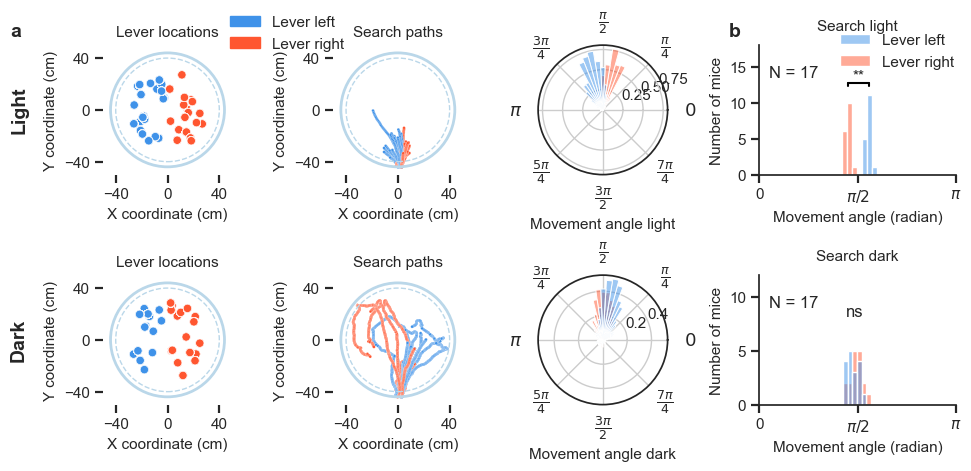

In [ ]:
test1_searchDf = concatenated_filtered[concatenated_filtered.sessionName == 'jp3269-30112022-0110'].copy()
testG1_searchDf = test1_searchDf.groupby(['sessionName','trialNo']).apply(calculate_movement_vector).reset_index(drop=True)
testGT1SearchPath = result.copy()

rowSize,colSize= 2.3,2.4
ncols=5
nrows=2
fig = plt.figure(figsize=(4*colSize, nrows*rowSize), constrained_layout=True) # create a figure
gs = fig.add_gridspec(ncols=ncols, nrows=nrows, width_ratios=[0.01,1,1,1,1])
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})

#Data Used For Making the Plot
sns.set_theme(style = 'ticks')

# First Column
ax = fig.add_subplot(gs[0,1])
plot_lever_location(ax,test1_searchDf,'light',title='Lever locations')

draw_circle(ax)
draw_circle(ax,r=40,lw=1,ls='dashed')

ax = fig.add_subplot(gs[1,1])
plot_lever_location(ax,test1_searchDf,'dark',title='Lever locations')

draw_circle(ax)
draw_circle(ax,r=40,lw=1,ls='dashed')

# Second Column
ax = fig.add_subplot(gs[0,2])
plot_lever_animal_path(ax,test1_searchDf,'light',title='Search paths')

draw_circle(ax)
draw_circle(ax,r=40,lw=1,ls='dashed')

ax = fig.add_subplot(gs[1,2])
plot_lever_animal_path(ax,test1_searchDf,'dark',title='Search paths')

draw_circle(ax)
draw_circle(ax,r=40,lw=1,ls='dashed')

# Third Column
ax = fig.add_subplot(gs[0,3], projection='polar')
plot_left_right_distribution(ax,testG1_searchDf,'light')
ax.set_xlabel('Movement angle light',fontsize=GLOBALFONTSIZE)

ticks = np.linspace(0, 2 * np.pi, num=8, endpoint=False)
tick_labels = [r'$0$', r'$\frac{\pi}{4}$', r'$\frac{\pi}{2}$', r'$\frac{3\pi}{4}$', r'$\pi$', r'$\frac{5\pi}{4}$', r'$\frac{3\pi}{2}$', r'$\frac{7\pi}{4}$']
ax.set_xticks(ticks)
ax.set_xticklabels(tick_labels,fontsize=GLOBALFONTSIZE+2)


ax = fig.add_subplot(gs[1,3], projection='polar')
plot_left_right_distribution(ax,testG1_searchDf,'dark')
ax.set_xlabel('Movement angle dark',fontsize=GLOBALFONTSIZE)

ticks = np.linspace(0, 2 * np.pi, num=8, endpoint=False)
tick_labels = [r'$0$', r'$\frac{\pi}{4}$', r'$\frac{\pi}{2}$', r'$\frac{3\pi}{4}$', r'$\pi$', r'$\frac{5\pi}{4}$', r'$\frac{3\pi}{2}$', r'$\frac{7\pi}{4}$']
ax.set_xticks(ticks)
ax.set_xticklabels(tick_labels,fontsize=GLOBALFONTSIZE+2)

# Fourth column
ax = fig.add_subplot(gs[0,4])
plot_kuiper_stats_per_mouse(ax,testGT1SearchPath,'light','Search light',showLegend=True,ylim=18,stA=0.45,stB=0.56,bins=7)

ax = fig.add_subplot(gs[1,4])
plot_kuiper_stats_per_mouse(ax,testGT1SearchPath,'dark','Search dark',plotStatsBar=False,bins=6)


ax = fig.add_subplot(gs[0,0])
ax.set_ylabel('Light',fontsize=GLOBALFONTSIZE+3,fontweight='1000')
remove_spines(ax)
remove_all_ticks(ax)

ax = fig.add_subplot(gs[1,0])
ax.set_ylabel('Dark',fontsize=GLOBALFONTSIZE+3,fontweight='1000')
remove_spines(ax)
remove_all_ticks(ax)

gs1 = GridSpecFromSubplotSpec(1, 1, subplot_spec=gs[:,:])

#***********************************#
ax0 = fig.add_subplot(gs1[:,:])

import matplotlib.patches as mpatches
def plot_lever_legend(ax):
    # Create custom legend handles
    red_patch = mpatches.Patch(color='#3F92E9', label='Lever left')
    blue_patch = mpatches.Patch(color='#FF5630', label='Lever right')

    # Add the custom legend to the plot 
    ax.legend(handles=[red_patch, blue_patch],loc=(0.22, 0.94),frameon=False,ncol=1, fontsize=GLOBALFONTSIZE)

plot_lever_legend(ax0)

#Add figure legend
add_text(ax0,0,1,'a',fw='900')
add_text(ax0,0.76,1,'b',fw='900')


ax0.axis('off')

plt.savefig('../../Output/Ext_Figure1.jpg', bbox_inches='tight', dpi=300)